In [91]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [92]:
with open('names.txt', 'r') as f:
    names = f.read().splitlines()

possible_chars = sorted(list(set('.' + ''.join(names))))
n_possible_chars = len(possible_chars)

In [93]:
# Hyperparameters

n_dimension = 2
LookUp = torch.rand((n_possible_chars, n_dimension))

n_context_block = 4

size_interm_layer = 300
W1 = torch.randn((n_context_block * n_dimension, size_interm_layer)) * 0.3
b1 = torch.randn((1, size_interm_layer)) * 0.1

W2 = torch.randn((size_interm_layer, 27)) * 0.1
b2 = torch.randn((1, 27)) * 0

alpha = torch.ones(1, size_interm_layer)
beta = torch.zeros(1, size_interm_layer)

parameters = [LookUp, W1, b1, W2, b2, alpha, beta]

for p in parameters:
    p.requires_grad = True

In [94]:
X = []
Y = []

for name in names:
    context = [0] * n_context_block
    for char in name + '.':
        char_index = possible_chars.index(char)
        X.append(context)
        Y.append(char_index)
        context = context[1:] + [char_index]

X = torch.tensor(X)
Y = torch.tensor(Y)

n_total_examples = len(X)
n_80pct = int(n_total_examples * 0.8)
n_90pct = int(n_total_examples * 0.9)

X_train = X[:n_80pct]
Y_train = Y[:n_80pct]

X_val = X[n_80pct:n_90pct]
Y_val = Y[n_80pct:n_90pct]

X_test = X[n_90pct:]
Y_test = X[n_90pct:]

In [109]:
pre_interm_layer.mean(0, keepdim=True).shape

torch.Size([1, 300])

1 / 20000 : 3.902413845062256
1001 / 20000 : 2.659766912460327
2001 / 20000 : 2.782250165939331
3001 / 20000 : 2.2132527828216553
4001 / 20000 : 2.5177674293518066
5001 / 20000 : 2.5699281692504883
6001 / 20000 : 2.448989152908325
7001 / 20000 : 2.4409635066986084
8001 / 20000 : 2.5314443111419678
9001 / 20000 : 2.579831600189209
10001 / 20000 : 2.1649768352508545
11001 / 20000 : 2.3651230335235596
12001 / 20000 : 2.457472085952759
13001 / 20000 : 2.2896575927734375
14001 / 20000 : 2.347726583480835
15001 / 20000 : 2.2768125534057617
16001 / 20000 : 2.4374380111694336
17001 / 20000 : 2.2856228351593018
18001 / 20000 : 2.3327713012695312
19001 / 20000 : 2.6405646800994873


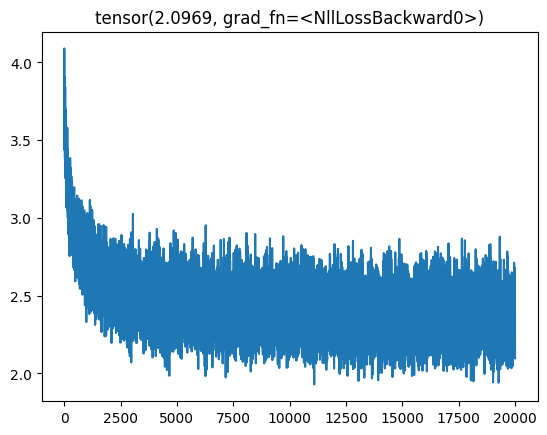

In [110]:
BATCH_SIZE = 64
n_epics = int(20e3)

for i in range(n_epics):

    bach_idx = torch.randint(0, X_train.shape[0], (BATCH_SIZE,))
    X_batch = X_train[bach_idx]
    Y_batch = Y_train[bach_idx]

    X_emb = LookUp[X_batch].view(-1, n_context_block * n_dimension)

    pre_interm_layer = X_emb @ W1 + b1
    pre_interm_layer = alpha * ((pre_interm_layer - pre_interm_layer.mean(0, keepdim=True))/pre_interm_layer.std(0, keepdim=True)) + beta
    interm_layer = pre_interm_layer.tanh()
    output_layer = (interm_layer @ W2 + b2)

    loss = F.cross_entropy(output_layer, Y_batch)
    loss_hist.append(loss.item())

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        p.data += -0.005 * p.grad

    if i % 1000 == 0:
        print(f'{i+1} / {n_epics} : {loss.item()}')
        
plt.plot(loss_hist)
plt.title(loss)
plt.show()

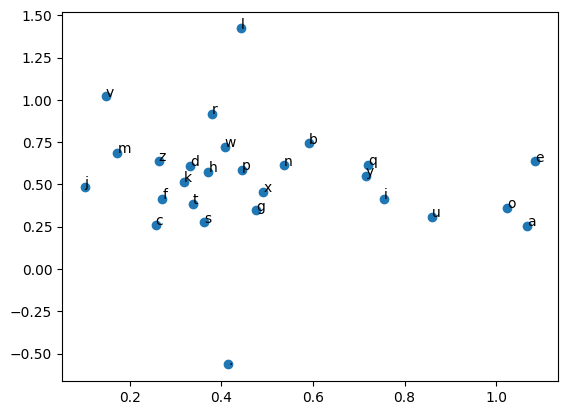

In [111]:
coord_x = []
coord_y = []
labels = []
for i in range(27):
    coord_x.append(LookUp[i, 0].data.item())
    coord_y.append(LookUp[i, 1].data.item())
    labels.append(possible_chars[i])

fig, ax = plt.subplots()
ax.scatter(coord_x, coord_y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (coord_x[i], coord_y[i]))
plt.show()

In [112]:
# Sampling from Model
n_names = 20
softmax = torch.nn.Softmax(dim=1)

for _ in range(n_names):
    context = [0] * n_context_block
    new_char = None
    name = ''
    while new_char != '.':
        emb = LookUp[context].view(-1, n_context_block * n_dimension)

        interm_layer = (emb @ W1 + b1).tanh()
        output_layer = (interm_layer @ W2 + b2)
        probs = softmax(output_layer)

        new_char_idx = torch.multinomial(probs, num_samples=1).item()
        new_char = possible_chars[new_char_idx]
        name += new_char
        context = context[1:] + [new_char_idx]
    print(name)


rusnr.
vllrp.
qzvl.
zzla.
dzbvlxw.
urahl.
nlhs.
zublierra.
wanr.
bbih.
zcthgghybzonuhzlrm.
kvmunjpq.
hzfswxip.
hscxl.
viletslan.
nfempsyandvlon.
nlafx.
ay.
fbuis.
bmas.
